<a href="https://colab.research.google.com/github/zhuzz12/cvdl/blob/main/DL_Lab_4_LSTM_ZhuldyzayAitakhunova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
import pandas as pd
df= pd.DataFrame()

df = pd.read_csv('/content/EcoPreprocessed.csv')


In [ ]:
df

,Unnamed: 0,review,polarity,division
0,3870,able play youtube alexa,0.5000,positive
1,62,able recognize indian accent really well drop ...,0.2794,positive
2,487,absolute smart device amazon connect external ...,0.1827,positive
3,3204,absolutely amaze new member family control hom...,0.3682,positive
4,1265,absolutely amaze previously sceptical invest m...,0.2333,positive
...,...,...,...,...
4079,852,yo yo yo love go if want one smart speaker val...,0.4571,positive
4080,2163,youtube music,0.0000,neutral
4081,2488,youtube support nahi kartasong recognise achha...,0.0000,neutral
4082,651,yup proscontrols wipro light amazinglysony bra...,0.0000,neutral


In [ ]:
len(df['review'].values.tolist())

4084

In [ ]:
df['division'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
#df = df[df.division != 'neutral']

In [ ]:
df['division'].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

In [ ]:
comment = df['review'].values.tolist()
grade = df['division'].values.tolist()
target_mapping = {
    'negative': [1, 0, 0],
    'neutral': [0, 1, 0], 
    'positive': [0, 0, 1]
}
grade = np.array([target_mapping[cls] for cls in grade])

In [ ]:
print(comment[1],' ',grade[1])

able recognize indian accent really well drop function helpful call device talk person near device smart plug schedule work seamlessly con would sound kindloud but lack clarity mid frequency need tweeked optimum clarity rarely device doesnt respond call alexa   [0 0 1]


In [ ]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def preproccessing(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in punctuation])
    text = text.split(' ')
    #print ('Number of reviews :', len(text))
    return text 

In [ ]:
tokenized_corpus = [preproccessing(i) for i in comment ]

In [ ]:
tokenized_corpus[:5]

[['able', 'play', 'youtube', 'alexa'],
 ['able',
  'recognize',
  'indian',
  'accent',
  'really',
  'well',
  'drop',
  'function',
  'helpful',
  'call',
  'device',
  'talk',
  'person',
  'near',
  'device',
  'smart',
  'plug',
  'schedule',
  'work',
  'seamlessly',
  'con',
  'would',
  'sound',
  'kindloud',
  'but',
  'lack',
  'clarity',
  'mid',
  'frequency',
  'need',
  'tweeked',
  'optimum',
  'clarity',
  'rarely',
  'device',
  'doesnt',
  'respond',
  'call',
  'alexa'],
 ['absolute',
  'smart',
  'device',
  'amazon',
  'connect',
  'external',
  'sub',
  'woofer',
  'sound',
  'amaze',
  'recons',
  'voice',
  'even',
  'close',
  'room',
  'like',
  'almost',
  'collection',
  'songs',
  'english',
  'hindi',
  'must',
  'quite',
  'moneys',
  'worth'],
 ['absolutely',
  'amaze',
  'new',
  'member',
  'family',
  'control',
  'home',
  'voice',
  'connect',
  'home',
  'anywhere',
  'world'],
 ['absolutely',
  'amaze',
  'previously',
  'sceptical',
  'invest',
 

In [ ]:
vocabulary = []
for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)
print(vocabulary)

['able', 'play', 'youtube', 'alexa', 'recognize', 'indian', 'accent', 'really', 'well', 'drop', 'function', 'helpful', 'call', 'device', 'talk', 'person', 'near', 'smart', 'plug', 'schedule', 'work', 'seamlessly', 'con', 'would', 'sound', 'kindloud', 'but', 'lack', 'clarity', 'mid', 'frequency', 'need', 'tweeked', 'optimum', 'rarely', 'doesnt', 'respond', 'absolute', 'amazon', 'connect', 'external', 'sub', 'woofer', 'amaze', 'recons', 'voice', 'even', 'close', 'room', 'like', 'almost', 'collection', 'songs', 'english', 'hindi', 'must', 'quite', 'moneys', 'worth', 'absolutely', 'new', 'member', 'family', 'control', 'home', 'anywhere', 'world', 'previously', 'sceptical', 'invest', 'money', 'arrive', 'ityou', 'buy', 'wont', 'regret', 'cheer', 'cheat', 'customer', 'if', 'product', 'definitely', 'want', 'prime', 'members', 'also', 'case', 'song', 'membership', 'otherwise', 'can', 'not', 'music', 'app', 'no', 'google', 'apps', 'anybody', 'go', 'everything', 'free', 'cost', 'house', 'hold', '

In [ ]:
len(vocabulary)

5158

In [ ]:
len(set(vocabulary))

5158

In [ ]:
word2idx

{'able': 0,
 'play': 1,
 'youtube': 2,
 'alexa': 3,
 'recognize': 4,
 'indian': 5,
 'accent': 6,
 'really': 7,
 'well': 8,
 'drop': 9,
 'function': 10,
 'helpful': 11,
 'call': 12,
 'device': 13,
 'talk': 14,
 'person': 15,
 'near': 16,
 'smart': 17,
 'plug': 18,
 'schedule': 19,
 'work': 20,
 'seamlessly': 21,
 'con': 22,
 'would': 23,
 'sound': 24,
 'kindloud': 25,
 'but': 26,
 'lack': 27,
 'clarity': 28,
 'mid': 29,
 'frequency': 30,
 'need': 31,
 'tweeked': 32,
 'optimum': 33,
 'rarely': 34,
 'doesnt': 35,
 'respond': 36,
 'absolute': 37,
 'amazon': 38,
 'connect': 39,
 'external': 40,
 'sub': 41,
 'woofer': 42,
 'amaze': 43,
 'recons': 44,
 'voice': 45,
 'even': 46,
 'close': 47,
 'room': 48,
 'like': 49,
 'almost': 50,
 'collection': 51,
 'songs': 52,
 'english': 53,
 'hindi': 54,
 'must': 55,
 'quite': 56,
 'moneys': 57,
 'worth': 58,
 'absolutely': 59,
 'new': 60,
 'member': 61,
 'family': 62,
 'control': 63,
 'home': 64,
 'anywhere': 65,
 'world': 66,
 'previously': 67,
 'scep

In [ ]:
idx2word

{0: 'able',
 1: 'play',
 2: 'youtube',
 3: 'alexa',
 4: 'recognize',
 5: 'indian',
 6: 'accent',
 7: 'really',
 8: 'well',
 9: 'drop',
 10: 'function',
 11: 'helpful',
 12: 'call',
 13: 'device',
 14: 'talk',
 15: 'person',
 16: 'near',
 17: 'smart',
 18: 'plug',
 19: 'schedule',
 20: 'work',
 21: 'seamlessly',
 22: 'con',
 23: 'would',
 24: 'sound',
 25: 'kindloud',
 26: 'but',
 27: 'lack',
 28: 'clarity',
 29: 'mid',
 30: 'frequency',
 31: 'need',
 32: 'tweeked',
 33: 'optimum',
 34: 'rarely',
 35: 'doesnt',
 36: 'respond',
 37: 'absolute',
 38: 'amazon',
 39: 'connect',
 40: 'external',
 41: 'sub',
 42: 'woofer',
 43: 'amaze',
 44: 'recons',
 45: 'voice',
 46: 'even',
 47: 'close',
 48: 'room',
 49: 'like',
 50: 'almost',
 51: 'collection',
 52: 'songs',
 53: 'english',
 54: 'hindi',
 55: 'must',
 56: 'quite',
 57: 'moneys',
 58: 'worth',
 59: 'absolutely',
 60: 'new',
 61: 'member',
 62: 'family',
 63: 'control',
 64: 'home',
 65: 'anywhere',
 66: 'world',
 67: 'previously',
 68: '

In [ ]:
comment_in_num = []
for sentence in tokenized_corpus:
    comment_in_num.append([word2idx[word] for word in sentence])

In [ ]:
len(comment_in_num) == len(tokenized_corpus) == len(grade)

True

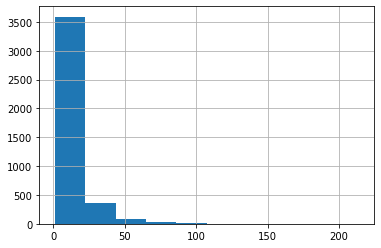

count    4084.000000
mean       11.070519
std        14.361363
min         1.000000
25%         3.000000
50%         7.000000
75%        14.000000
max       214.000000
dtype: float64

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
comment_len = [len(x) for x in comment_in_num]
pd.Series(comment_len).hist()
plt.show()
pd.Series(comment_len).describe()

In [ ]:
def pad_features(reviews_int, seq_length):
    #Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [ ]:
features = pad_features(comment_in_num, 200)

In [ ]:
features

array([[   0,    0,    0, ...,    1,    2,    3],
       [   0,    0,    0, ...,   36,   12,    3],
       [   0,    0,    0, ...,   56,   57,   58],
       ...,
       [   0,    0,    0, ...,  175, 5152, 3489],
       [   0,    0,    0, ...,  397, 2721, 5157],
       [   0,    0,    0, ..., 1042, 1245,  180]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(features),np.array(grade), test_size=0.20, random_state=42)

In [ ]:
len(X_train)

3267

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
test_data = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))
#train_data = TensorDataset(torch.cuda.FloatTensor(X_train), torch.cuda.LongTensor(y_train))
#test_data = TensorDataset(torch.cuda.FloatTensor(X_test), torch.cuda.LongTensor(y_test))
# dataloaders
batch_size = 30
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [ ]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([30, 200])
Sample input: 
 tensor([[   0,    0,    0,  ...,    3,  307, 1587],
        [   0,    0,    0,  ...,  138, 1040,   58],
        [   0,    0,    0,  ..., 1021,   45,   85],
        ...,
        [   0,    0,    0,  ...,  264,  131,  331],
        [   0,    0,    0,  ..., 2569,  240, 1461],
        [   0,    0,    0,  ...,   24,  269,  171]])

Sample label size:  torch.Size([30, 3])
Sample label: 
 tensor([[0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0],
        [0, 0, 1],
        [1, 0, 0],
        [0, 0, 1],
        [1, 0, 0],
        

<li>0. Tokenize : This is not a layer for LSTM network but a mandatory step of converting our words into tokens (integers)
<li>Embedding Layer: that converts our word tokens (integers) into embedding of specific size
<li>LSTM Layer: defined by hidden state dims and number of layers
<li>Fully Connected Layer: that maps output of LSTM layer to a desired output size
<li>Sigmoid Activation Layer: that turns all output values in a value between 0 and 1
<li>Output: Sigmoid output from the last timestep is considered as the final output of this network

In [ ]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, batch_first=True)
        self.dropout = nn.Dropout(0.2)
        self.linear = nn.Linear(hidden_dim, output_size)
        #self.soft = nn.Softmax(dim = 1)
        
        
    def forward(self, x):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return (self.linear(ht[-1]))

In [ ]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocabulary)+1 # +1 for the 0 padding
output_size = 3
embedding_dim = 200
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)


SentimentLSTM(
  (embeddings): Embedding(5159, 200, padding_idx=0)
  (lstm): LSTM(200, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (linear): Linear(in_features=256, out_features=3, bias=True)
  (soft): Softmax(dim=1)
)


In [ ]:
import tqdm 
# loss and optimization functions
lr=0.001
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

# training params


counter = 0
print_every = 10
clip=5 # gradient clipping
# move model to GPU, if available
train_on_gpu = True
if(train_on_gpu):
    net.cuda()

net.train()
losses = []
epochs = 40
# train for some number of epochs
for e in tqdm.tqdm (range(epochs)):
    loss_ = []
    # batch loop
    for inputs, labels in train_loader:
        net.train()
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        inputs = inputs.type(torch.cuda.LongTensor)
        output = net(inputs)
        #loss = criterion(output, labels.float())
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()
        loss_.append(loss.item())
    losses.append(np.mean(loss_))      

100%|██████████| 40/40 [01:33<00:00,  2.33s/it]


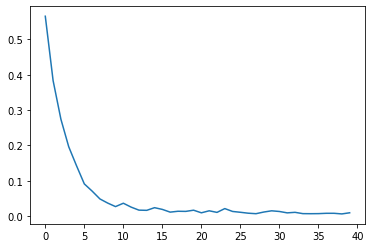

In [ ]:
plt.plot(range(len(losses)), losses, label='train')

In [ ]:
losses

[0.5652935820708581,
 0.38331282890717916,
 0.27400823949127023,
 0.1962278827067909,
 0.14240275121746807,
 0.0909773654629126,
 0.07062860955526933,
 0.04842487990497312,
 0.03670357576669664,
 0.02676755282974486,
 0.036293940764420385,
 0.02527408953435685,
 0.01674728929983674,
 0.01620174119413997,
 0.023705540648383865,
 0.018824112365810507,
 0.011118188598529657,
 0.013565079689932636,
 0.013215174378107361,
 0.016584346154675987,
 0.00920972045430371,
 0.01488332362424202,
 0.010403599597422493,
 0.02113681607820289,
 0.013031542110401036,
 0.010687982982653086,
 0.008087880029485918,
 0.0066972544841060345,
 0.011391088227998282,
 0.014849656526775766,
 0.012960538948424707,
 0.009041056801592227,
 0.0105536090835679,
 0.006868681314290788,
 0.006676418555381392,
 0.006874830759251373,
 0.007793050700798764,
 0.007808081596922754,
 0.006064363733207547,
 0.009262616039241622]

In [ ]:
test_losses = [] # track loss
num_correct = 0

# init hidden state

net.eval()
# iterate over test data
for inputs, labels in test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    inputs = inputs.type(torch.cuda.LongTensor)
    output= net(inputs)
    #print(output)
    
    # calculate loss
    loss = criterion(output.squeeze(), labels.float())
    test_losses.append(loss.item())
  

    # convert output probabilities to predicted class (0 or 1)
    pred = torch.argmax(output.squeeze(), axis = 1)  # rounds to the nearest integer
    #print(pred)

    # compare predictions to true label
    correct_tensor = torch.argmax(labels, axis = 1) == pred
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.858
Test accuracy: 0.859


In [ ]:
def predict(net, test_review, sequence_length=200):
    
    net.eval()
    
    # tokenize review
    test_words = preproccessing(test_review)
    test_ints = []
    test_ints.append([word2idx[word] for word in test_words])
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(test_ints, seq_length)
    print(features)
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output = net(feature_tensor)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.zeros((output_size))
    pred[torch.argmax(output.squeeze())] =1
    print (pred)
    # printing output value, before rounding
    #print('Prediction value, pre-rounding: {:.6f}'.format(output.item()))
    
    # print custom response
    if (torch.argmax(pred)==0):
        print("Negative review detected!")
    elif (torch.argmax(pred)==1):
        print("Neutral review detected.")
    else: 
        print("Positive review detected.")

In [ ]:
predict(net, 'do not like',200)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 600
   91  49]]
tensor([0., 1., 0.])
Neutral review detected.


In [ ]:
predict(net, 'extremely good',200)

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   